In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
sns.set()
pd.set_option('max_columns', 999)

In [4]:
df = pd.read_csv('/Users/daviderickson/projects/datasf/data/Assessor_Historical_Secured_Property_Tax_Rolls.csv')

/Users/daviderickson/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_flw = df[df['Property Location'].str.contains('140 MAIDEN')] # Frank Lloyd Wright VC Morris Gift Shop
display(df_flw)

,Closed Roll Year,Property Location,Parcel Number,Block,Lot,Volume Number,Use Code,Use Definition,Property Class Code,Property Class Code Definition,Year Property Built,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,Number of Units,Zoning Code,Construction Type,Lot Depth,Lot Frontage,Property Area,Basement Area,Lot Area,Lot Code,Tax Rate Area Code,Percent of Ownership,Exemption Code,Exemption Code Definition,Status Code,Misc Exemption Value,Homeowner Exemption Value,Current Sales Date,Assessed Fixtures Value,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,Assessor Neighborhood District,Assessor Neighborhood Code,Assessor Neighborhood,Supervisor District,Analysis Neighborhood,the_geom,Row ID
761057,2012.0,0000 0140 MAIDEN LN0000,0309019,0309,019,3,COMR,Commercial Retail,C,Commercial Stores,1909.0,4.0,0,9,2,2,C3R,A,0.0,0.0,4800,0.0,2748.0,NaN,1000.0,1.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1037346.0,1037346.0,0.0,8.0,8I,Union Square,3,Financial District/South Beach,"(37.788265442475, -122.40589012582)",201201010309019
780070,2008.0,0000 0140 MAIDEN LN0000,0309019,0309,019,3,COMR,Commercial Retail,C,Commercial Stores,1909.0,4.0,0,9,2,2,C3R,A,0.0,0.0,4800,0.0,2748.0,NaN,1000.0,1.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,991965.0,991965.0,0.0,8.0,8I,Union Square,3,Financial District/South Beach,"(37.788265442475, -122.40589012582)",200801010309019
870170,2009.0,0000 0140 MAIDEN LN0000,0309019,0309,019,3,COMR,Commercial Retail,C,Commercial Stores,1909.0,4.0,0,9,2,2,C3R,A,0.0,0.0,4800,0.0,2748.0,NaN,1000.0,1.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1011804.0,1011804.0,0.0,8.0,8I,Union Square,3,Financial District/South Beach,"(37.788265442475, -122.40589012582)",200901010309019
1072646,2010.0,0000 0140 MAIDEN LN0000,0309019,0309,019,3,COMR,Commercial Retail,C,Commercial Stores,1909.0,4.0,0,9,2,2,C3R,A,0.0,0.0,4800,0.0,2748.0,NaN,1000.0,1.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1009406.0,1009406.0,0.0,8.0,8I,Union Square,3,Financial District/South Beach,"(37.788265442475, -122.40589012582)",201001010309019
1254479,2007.0,0000 0140 MAIDEN LN0000,0309019,0309,019,3,COMR,Commercial Retail,C,Commercial Stores,1909.0,4.0,0,9,2,2,C3R,A,0.0,0.0,4800,0.0,2748.0,NaN,1000.0,1.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,972515.0,972515.0,0.0,8.0,8I,Union Square,3,Financial District/South Beach,"(37.788265442475, -122.40589012582)",200701010309019
1485965,2011.0,0000 0140 MAIDEN LN0000,0309019,0309,019,3,COMR,Commercial Retail,C,Commercial Stores,1909.0,4.0,0,9,2,2,C3R,A,0.0,0.0,4800,0.0,2748.0,NaN,1000.0,1.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1017006.0,1017006.0,0.0,8.0,8I,Union Square,3,Financial District/South Beach,"(37.788265442475, -122.40589012582)",201101010309019
1532279,2016.0,0000 0140 MAIDEN LN0000,0309019,0309,019,3,COMR,Commercial Retail,C,Commercial Stores,1909.0,4.0,0,9,2,2,C3R,A,0.0,0.0,4800,0.0,2748.0,NaN,1000.0,1.0,NaN,NaN,NaN,0.0,0.0,2015/06/24,0.0,1100663.0,1100663.0,0.0,8.0,8I,Union Square,3,Financial District/South Beach,"(37.788265442475, -122.40589012582)",201601010309019
1763048,2015.0,0000 0140 MAIDEN LN0000,0309019,0309,019,3,COMR,Commercial Retail,C,Commercial Stores,1909.0,4.0,0,9,2,2,C3R,A,0.0,0.0,4800,0.0,2748.0,NaN,1000.0,1.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1084131.0,1084131.0,0.0,8.0,8I,Union Square,3,Financial District/South Beach,"(37.788265442475, -122.40589012582)",201501010309019
1893789,2013.0,0000 0140 MAIDEN LN0000,0309019,0309,019,3,COMR,Commercial Retail,C,Commercial Stores,1909.0,4.0,0,9,2,2,C3R,A,0.0,0.0,4800,0.0,2748.0,NaN,1000.0,1.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1058092.0,1058092.0,0.0,8.0,8I,Union Square,3,Financial District/South Beach,"(37.788265442475, -122.40589012582)",201301010309019
1894516,2014.0,0000 0140 MAIDEN LN0000,0309019,0309,019,3,COMR,Commercial Retail,C,Commercial Stores,1909.0,4.0,0,9,2,2,C3R,A,0.0,0.0,4800,0.0,2748.0,NaN,1000.0,1.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,1062895.0,1062895.0,0.0,8.0,8I,Union Square,3,Financial District/South Beach,"(37.788265442475, -122.40589012582)",201401010309019


No handles with labels found to put in legend.


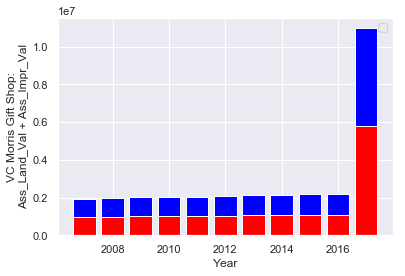

In [6]:
# plt.bar(df_flw['Closed Roll Year'], df_flw['Assessed Improvement Value'] + df_flw['Assessed Land Value'], 
#         alpha=1, color='grey')
plt.bar(df_flw['Closed Roll Year'], df_flw['Assessed Land Value'], color='red')
plt.bar(df_flw['Closed Roll Year'], df_flw['Assessed Improvement Value'], 
        bottom=df_flw['Assessed Land Value'], color='blue')
plt.legend()
plt.ylim(0,);
plt.ylabel('VC Morris Gift Shop:\nAss_Land_Val + Ass_Impr_Val')
plt.xlabel('Year');

In [8]:
df.dtypes

Closed Roll Year                    float64
Property Location                    object
Parcel Number                        object
Block                                object
Lot                                  object
Volume Number                         int64
Use Code                             object
Use Definition                       object
Property Class Code                  object
Property Class Code Definition       object
Year Property Built                 float64
Number of Bathrooms                 float64
Number of Bedrooms                    int64
Number of Rooms                       int64
Number of Stories                     int64
Number of Units                       int64
Zoning Code                          object
Construction Type                    object
Lot Depth                           float64
Lot Frontage                        float64
Property Area                         int64
Basement Area                       float64
Lot Area                        

In [9]:
df.shape

(2238147, 43)

In [10]:
df.head(5)

,Closed Roll Year,Property Location,Parcel Number,Block,Lot,Volume Number,Use Code,Use Definition,Property Class Code,Property Class Code Definition,Year Property Built,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,Number of Units,Zoning Code,Construction Type,Lot Depth,Lot Frontage,Property Area,Basement Area,Lot Area,Lot Code,Tax Rate Area Code,Percent of Ownership,Exemption Code,Exemption Code Definition,Status Code,Misc Exemption Value,Homeowner Exemption Value,Current Sales Date,Assessed Fixtures Value,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,Assessor Neighborhood District,Assessor Neighborhood Code,Assessor Neighborhood,Supervisor District,Analysis Neighborhood,the_geom,Row ID
0,2007.0,0000 0200 BRANNAN ST0436,3774412,3774,412,25,SRES,Single Family Residential,Z,Condominium,2004.0,1.0,2,0,2,0,NaN,NaN,0.0,0.0,1820,0.0,0.0,NaN,1004.0,1.0,NaN,NaN,NaN,0.0,0.0,1950/11/04,0.0,660074.0,660074.0,0.0,9.0,9H,South Beach,6,Financial District/South Beach,"(37.783600301443, -122.390711686202)",200701013774412
1,2016.0,0000 1207 INDIANA ST0004,4228041,4228,041,27,SRES,Single Family Residential,Z,Condominium,2000.0,2.0,2,5,2,1,NaN,NaN,0.0,0.0,1589,0.0,0.0,NaN,1000.0,0.5,11,Home Owners,NaN,0.0,7000.0,2013/12/20,0.0,448902.0,448902.0,0.0,9.0,9E,Potrero Hill,10,Potrero Hill,"(37.75482032723, -122.390407823087)",201601014228041
2,2010.0,0000 0383 SITUS TO BE ASSIGNEDST0000,0041102,0041,102,1,COMR,Commercial Retail,C,Commercial Stores,NaN,3.0,0,0,2,5,NaN,NaN,0.0,0.0,11507,0.0,0.0,NaN,1000.0,0.7,NaN,NaN,NaN,0.0,0.0,NaN,0.0,643682.0,1396687.0,0.0,8.0,8D,North Beach,3,North Beach,"(37.805391366593, -122.413327689424)",201001010041102
3,2007.0,0000 0708 NORTH POINT STT 1,0024038,0024,038,1,SRES,Single Family Residential,Z,Condominium,2000.0,2.0,3,5,1,1,NaN,NaN,0.0,0.0,1150,0.0,0.0,NaN,1000.0,1.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,365523.0,365523.0,0.0,8.0,8E,Russian Hill,2,Russian Hill,"(37.806098058572, -122.419076819471)",200701010024038
4,2016.0,0000 0188 MARY TERESA ST0000,5054A152,5054A,152,30,SRES,Single Family Residential,D,Dwelling,2008.0,2.0,2,0,0,0,NaN,NaN,0.0,0.0,1360,0.0,0.0,NaN,1000.0,1.0,11,Home Owners,NaN,0.0,7000.0,2014/11/21,0.0,255843.0,383764.0,0.0,10.0,10K,Bayview Heights,10,Bayview Hunters Point,"(37.713888461234, -122.399170485325)",201601015054A152


In [11]:
df['Closed Roll Year'].unique()

array([2007., 2016., 2010., 2015., 2008., 2013., 2012., 2009., 2011.,
       2014.,   nan, 2017.])

In [12]:
df[df['Closed Roll Year'].isna()]

,Closed Roll Year,Property Location,Parcel Number,Block,Lot,Volume Number,Use Code,Use Definition,Property Class Code,Property Class Code Definition,Year Property Built,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,Number of Units,Zoning Code,Construction Type,Lot Depth,Lot Frontage,Property Area,Basement Area,Lot Area,Lot Code,Tax Rate Area Code,Percent of Ownership,Exemption Code,Exemption Code Definition,Status Code,Misc Exemption Value,Homeowner Exemption Value,Current Sales Date,Assessed Fixtures Value,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,Assessor Neighborhood District,Assessor Neighborhood Code,Assessor Neighborhood,Supervisor District,Analysis Neighborhood,the_geom,Row ID
1878628,NaN,0000 0127 VERNON ST0000,7085015,7085,015,42,SRES,Single Family Residential,D,Dwelling,1941.0,1.0,0,4,1,1,RH1,D,0.0,0.0,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3G,Ingleside Heights,11,Oceanview/Merced/Ingleside,"(37.714820229116, -122.46827991556)",1901017085015


In [38]:
def search_st_address(string, df):
    # Searches df['Property Location'] for string.lower()
    str_dummy = string
    str_dummy = str_dummy.upper()
    return df[df['Property Location'].str.contains(str_dummy)]     

In [48]:
df_temp = search_st_address('127 vernon', df)
print('Missing year row is 2011: ')
sorted(df_temp['Closed Roll Year'].unique())

Missing year row is 2011: 


[2007.0,
 2008.0,
 2009.0,
 2010.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 nan,
 2017.0]

In [50]:
df.loc[df['Closed Roll Year'].isna(), 'Closed Roll Year'] = 2011

In [51]:
df_temp = search_st_address('127 vernon', df)
print('Missing year row is 2011: ')
sorted(df_temp['Closed Roll Year'].unique())

Missing year row is 2011: 


[2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0]

In [57]:
def plot_address_valVSyear(string, df):

    df_temp = search_st_address(string, df)

    plt.bar(df_temp['Closed Roll Year'], df_temp['Assessed Land Value'], color='red')
    plt.bar(df_temp['Closed Roll Year'], df_temp['Assessed Improvement Value'], 
            bottom=df_temp['Assessed Land Value'], color='blue')
#     plt.legend()
    plt.title(string)
    plt.ylim(0,);
    plt.ylabel('Ass_Land_Val + Ass_Impr_Val')
    plt.xlabel('Year');

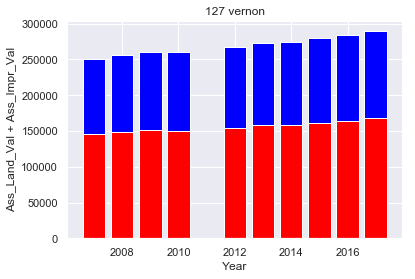

In [58]:
plot_address_valVSyear('127 vernon', df)

In [59]:
df.dtypes

Closed Roll Year                    float64
Property Location                    object
Parcel Number                        object
Block                                object
Lot                                  object
Volume Number                         int64
Use Code                             object
Use Definition                       object
Property Class Code                  object
Property Class Code Definition       object
Year Property Built                 float64
Number of Bathrooms                 float64
Number of Bedrooms                    int64
Number of Rooms                       int64
Number of Stories                     int64
Number of Units                       int64
Zoning Code                          object
Construction Type                    object
Lot Depth                           float64
Lot Frontage                        float64
Property Area                         int64
Basement Area                       float64
Lot Area                        

In [ ]:
'''
NEED TO NOW SAVE THE CLEANED DATA, 
THEN WRITE SCRIPTS TO IMPORT DATA PROPERLY


-Closed roll year should be dateteime or int
-Check all dtypes for clues for data cleaning
-Write scripts to automate some of the standard aspsects of cleaning
--Or get other packages (e.g. pandas-profiling) working


'''

In [66]:
print('Converting Closed_Roll_Year to datetime from Float')
df['Closed Roll Year'] = pd.to_datetime(df['Closed Roll Year'])

Converting Closed_Roll_Year to datetime from Float


In [13]:
df.describe()

,Closed Roll Year,Volume Number,Year Property Built,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,Number of Units,Lot Depth,Lot Frontage,Property Area,Basement Area,Lot Area,Tax Rate Area Code,Percent of Ownership,Misc Exemption Value,Homeowner Exemption Value,Assessed Fixtures Value,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,Assessor Neighborhood District,Supervisor District
count,2.238146e+06,2.238147e+06,2.064000e+06,2.238147e+06,2.238147e+06,2.238147e+06,2.238147e+06,2.238147e+06,2.238147e+06,2.238147e+06,2.238147e+06,2.238146e+06,2.238146e+06,2.232637e+06,2.238146e+06,2.238146e+06,2.238146e+06,2.238146e+06,2.238146e+06,2.238146e+06,2.238146e+06,2.237865e+06,2.238147e+06
mean,2.012061e+03,2.063252e+01,1.941636e+03,2.364135e+00,1.048956e+00,7.823049e+00,1.470800e+00,1.835442e+00,8.669454e+00,6.056058e-02,2.914840e+03,5.904724e+01,3.863050e+03,1.000725e+03,9.190668e-01,2.915795e+04,3.157840e+03,7.209944e+03,4.023147e+05,3.994016e+05,3.392403e+03,6.070209e+00,6.121937e+00
std,3.164951e+00,1.288068e+01,5.587058e+01,8.784859e+00,1.069431e+01,2.376514e+01,6.567046e+00,1.532557e+01,2.180097e+01,1.662870e+00,2.024116e+04,3.586176e+02,1.363840e+05,1.800430e+01,1.354783e+01,1.401633e+06,4.041963e+03,7.834920e+05,3.913785e+06,2.269509e+06,2.827261e+05,3.124298e+00,3.129490e+00
min,2.007000e+03,1.000000e+00,1.024000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,2.009000e+03,9.000000e+00,1.914000e+03,1.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,0.000000e+00,1.000000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.072400e+04,5.093500e+04,0.000000e+00,3.000000e+00,3.000000e+00
50%,2.012000e+03,1.900000e+01,1.935000e+03,1.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.410000e+03,0.000000e+00,2.495000e+03,1.000000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.867150e+05,1.966560e+05,0.000000e+00,7.000000e+00,6.000000e+00
75%,2.015000e+03,3.200000e+01,1.962000e+03,2.000000e+00,2.000000e+00,8.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.240000e+03,0.000000e+00,3.000000e+03,1.000000e+03,1.000000e+00,0.000000e+00,7.000000e+03,0.000000e+00,3.332948e+05,4.119580e+05,0.000000e+00,9.000000e+00,9.000000e+00
max,2.017000e+03,4.400000e+01,9.185000e+03,1.002000e+03,3.800000e+03,3.606000e+03,9.990000e+02,4.000000e+03,9.996000e+01,9.939000e+01,4.701100e+06,7.387800e+04,5.800145e+07,9.000000e+03,6.005000e+03,7.056831e+08,7.770000e+05,6.084663e+08,7.035785e+08,5.835724e+08,1.401327e+08,1.000000e+01,1.100000e+01


In [11]:
# Create two lists for the loop results to be placed
lat = []
lon = []

# For each row in a varible,
for row in df['the_geom']:
    # Try to,
    try:
        # Split the row by comma, convert to float, and append
        # everything before the comma to lat
        lon.append(float(row.split(',')[0].split('(')[1]))
        # Split the row by comma, convert to float, and append
        # everything after the comma to lon
        lat.append(float(row.split(',')[1].split(')')[0]))
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

# Create two new columns from lat and lon
df['latitude'] = lat
df['longitude'] = lon

In [15]:
for col in df.columns:
    match = re.search('Value', col)
    if match:
        print(col)

Misc Exemption Value
Homeowner Exemption Value
Assessed Fixtures Value
Assessed Improvement Value
Assessed Land Value
Assessed Personal Property Value


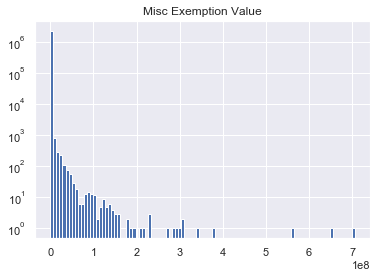

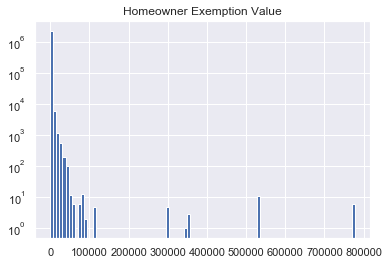

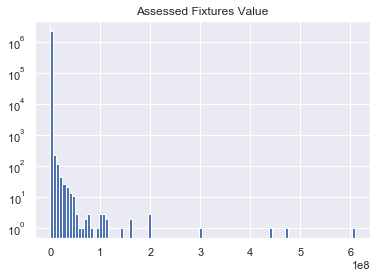

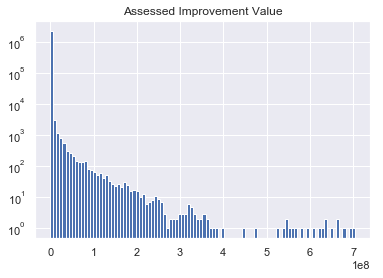

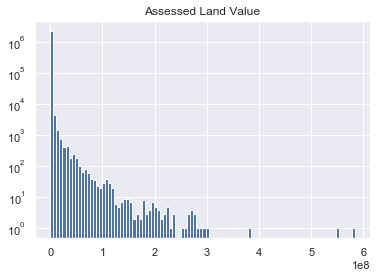

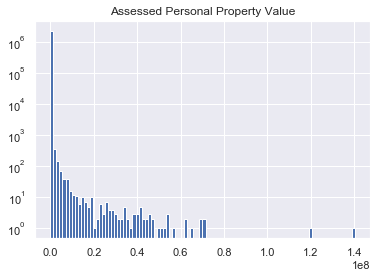

In [16]:
for col in df.columns:
    match = re.search('Value', col)
    if match:
        fig, ax = plt.subplots(figsize=(6, 4))
        df[col].hist(bins=100, log=True)
        ax.set_title(col)
        plt.show()
#         sns.distplot(df[col].dropna(), hist_kws={'log': True})
        plt.show()

In [17]:
df['Assessed Land Value'].describe()

count    2.238146e+06
mean     3.994016e+05
std      2.269509e+06
min      0.000000e+00
25%      5.093500e+04
50%      1.966560e+05
75%      4.119580e+05
max      5.835724e+08
Name: Assessed Land Value, dtype: float64

In [18]:
df['Closed Roll Year'].describe()

count    2.238146e+06
mean     2.012061e+03
std      3.164951e+00
min      2.007000e+03
25%      2.009000e+03
50%      2.012000e+03
75%      2.015000e+03
max      2.017000e+03
Name: Closed Roll Year, dtype: float64

In [19]:
df_groupby_nhood = df.groupby(by='Analysis Neighborhood').mean()

In [20]:
df_groupby_nhood.head()

,Closed Roll Year,Volume Number,Year Property Built,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,Number of Units,Lot Depth,Lot Frontage,Property Area,Basement Area,Lot Area,Tax Rate Area Code,Percent of Ownership,Misc Exemption Value,Homeowner Exemption Value,Assessed Fixtures Value,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,Assessor Neighborhood District,Supervisor District,latitude,longitude
Analysis Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,
Bayview Hunters Point,2012.115412,30.573240,1954.390809,1.430468,0.825309,4.785514,0.949438,0.901870,4.788595,0.061206,2252.225389,46.868250,8060.938689,1006.271992,0.881517,20147.900637,2500.375067,3232.613979,1.848966e+05,194842.564293,988.091794,9.974943,10.000000,-122.391053,37.728469
Bernal Heights,2012.018163,33.873737,1928.697692,1.622283,0.963739,6.130958,1.421408,1.214290,24.966979,0.125787,1531.737168,42.907715,2773.057689,1000.081733,0.887693,8700.166755,3660.577134,871.533120,1.992513e+05,233652.512622,718.568362,8.958734,8.960462,-122.415691,37.740517
Castro/Upper Market,2012.083478,21.047826,1928.370819,2.324171,0.909271,8.479299,1.715128,1.823466,6.554793,0.094287,2377.648388,26.901375,2453.277842,1000.000000,0.863461,10260.716014,3411.985109,1964.275594,3.394652e+05,421168.964318,511.733848,4.998844,8.000000,-122.435972,37.762216
Chinatown,2012.022899,1.987515,1934.773760,4.622873,0.496798,16.416650,2.618345,4.305841,12.836795,0.037001,9346.377321,91.048774,2731.916181,1000.000000,0.864644,120169.270651,1283.627660,31000.078595,1.284832e+06,985226.604890,13829.734588,8.000000,3.000000,-122.407802,37.795972
Excelsior,2012.003662,36.703389,1936.779750,1.529156,0.732952,6.075538,1.166961,1.103523,7.433125,0.047006,1645.633132,76.687472,2937.806074,1000.000000,0.865084,11576.864841,4119.776801,3556.041209,1.512944e+05,179716.883480,306.528692,9.999887,10.782732,-122.431931,37.719003


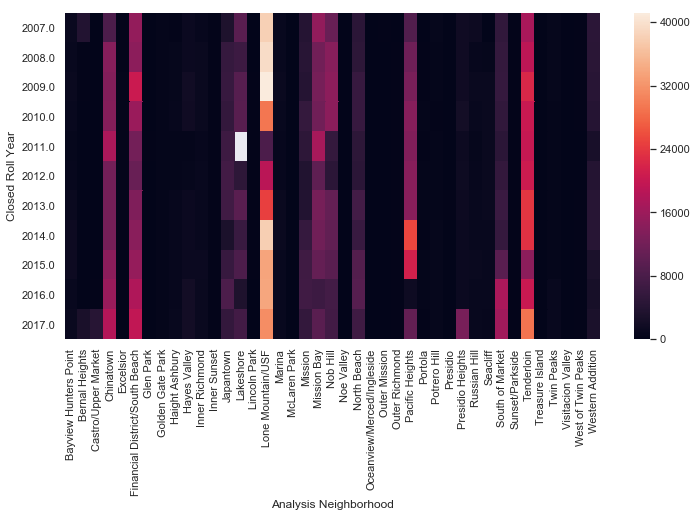

In [21]:
df_yr_nhood_appval = df.pivot_table(index='Closed Roll Year', columns='Analysis Neighborhood', values='Assessed Personal Property Value', aggfunc=np.mean)
plt.subplots(figsize=(12,6))
sns.heatmap(df_yr_nhood_appval)

In [22]:
# Plot above

In [23]:
df['Property Class Code Definition'].unique()

array(['Condominium', 'Commercial Stores', 'Dwelling',
       'Live/Work Condominium', 'Condominium BMR', 'Flats & Duplex',
       'Apartment', 'Coop Units Unsegregated',
       'Apartment 15 Units or more', 'Commercial Store Condo',
       'Coop Units Segregated', 'Flat & Store', 'Apartment 5 to 14 Units',
       'Parking Stall Condominium', 'Garages (Commercial)',
       'Condominium Economic Unit', 'Timeshare', 'Office - Condominium',
       'Industrial', 'Time Share Fractional', 'TI Apartment',
       'Town House', 'Apartmnt & Commercial Store', 'Town House BMR',
       'City Property', 'Office', '2 Dwellings on One Parcel',
       'Vacant Lot', 'Misc', 'Vacant Lot Comm and Ind',
       'PUD (Planned Unit Development)', 'Live/Work Condominium BMR',
       'Industrial Condominium', 'Hotels - Other',
       'Dwellings - Apartments', 'Hotel', 'Bank', 'Industial Warehouse',
       'Shopping Center', 'TI Flats & Duplex', 'Mixed use',
       'Clubs,Lodges,Fraternal Organizations', 'Schoo

In [24]:
list = df.dtypes==object
list = list.to_list()
print(np.sum(list), ' with dtype=object \n')
list #- 'Property Location'
# print(list)
print(df.loc[list].columns.to_list())
df.loc[list]

20  with dtype=object 

['Closed Roll Year', 'Property Location', 'Parcel Number', 'Block', 'Lot', 'Volume Number', 'Use Code', 'Use Definition', 'Property Class Code', 'Property Class Code Definition', 'Year Property Built', 'Number of Bathrooms', 'Number of Bedrooms', 'Number of Rooms', 'Number of Stories', 'Number of Units', 'Zoning Code', 'Construction Type', 'Lot Depth', 'Lot Frontage', 'Property Area', 'Basement Area', 'Lot Area', 'Lot Code', 'Tax Rate Area Code', 'Percent of Ownership', 'Exemption Code', 'Exemption Code Definition', 'Status Code', 'Misc Exemption Value', 'Homeowner Exemption Value', 'Current Sales Date', 'Assessed Fixtures Value', 'Assessed Improvement Value', 'Assessed Land Value', 'Assessed Personal Property Value', 'Assessor Neighborhood District', 'Assessor Neighborhood Code', 'Assessor Neighborhood', 'Supervisor District', 'Analysis Neighborhood', 'the_geom', 'Row ID', 'latitude', 'longitude']


,Closed Roll Year,Property Location,Parcel Number,Block,Lot,Volume Number,Use Code,Use Definition,Property Class Code,Property Class Code Definition,Year Property Built,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,Number of Units,Zoning Code,Construction Type,Lot Depth,Lot Frontage,Property Area,Basement Area,Lot Area,Lot Code,Tax Rate Area Code,Percent of Ownership,Exemption Code,Exemption Code Definition,Status Code,Misc Exemption Value,Homeowner Exemption Value,Current Sales Date,Assessed Fixtures Value,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,Assessor Neighborhood District,Assessor Neighborhood Code,Assessor Neighborhood,Supervisor District,Analysis Neighborhood,the_geom,Row ID,latitude,longitude
1,2016.0,0000 1207 INDIANA ST0004,4228041,4228,041,27,SRES,Single Family Residential,Z,Condominium,2000.0,2.0,2,5,2,1,NaN,NaN,0.0,0.0,1589,0.0,0.0,NaN,1000.0,0.50000,11,Home Owners,NaN,0.0,7000.0,2013/12/20,0.0,448902.0,448902.0,0.0,9.0,9E,Potrero Hill,10,Potrero Hill,"(37.75482032723, -122.390407823087)",201601014228041,-122.390408,37.754820
2,2010.0,0000 0383 SITUS TO BE ASSIGNEDST0000,0041102,0041,102,1,COMR,Commercial Retail,C,Commercial Stores,NaN,3.0,0,0,2,5,NaN,NaN,0.0,0.0,11507,0.0,0.0,NaN,1000.0,0.70000,NaN,NaN,NaN,0.0,0.0,NaN,0.0,643682.0,1396687.0,0.0,8.0,8D,North Beach,3,North Beach,"(37.805391366593, -122.413327689424)",201001010041102,-122.413328,37.805391
3,2007.0,0000 0708 NORTH POINT STT 1,0024038,0024,038,1,SRES,Single Family Residential,Z,Condominium,2000.0,2.0,3,5,1,1,NaN,NaN,0.0,0.0,1150,0.0,0.0,NaN,1000.0,1.00000,NaN,NaN,NaN,0.0,0.0,NaN,0.0,365523.0,365523.0,0.0,8.0,8E,Russian Hill,2,Russian Hill,"(37.806098058572, -122.419076819471)",200701010024038,-122.419077,37.806098
4,2016.0,0000 0188 MARY TERESA ST0000,5054A152,5054A,152,30,SRES,Single Family Residential,D,Dwelling,2008.0,2.0,2,0,0,0,NaN,NaN,0.0,0.0,1360,0.0,0.0,NaN,1000.0,1.00000,11,Home Owners,NaN,0.0,7000.0,2014/11/21,0.0,255843.0,383764.0,0.0,10.0,10K,Bayview Heights,10,Bayview Hunters Point,"(37.713888461234, -122.399170485325)",201601015054A152,-122.399170,37.713888
6,2015.0,0000 0199 NEW MONTGOMERY ST0601,3722136,3722,136,25,SRES,Single Family Residential,Z,Condominium,2004.0,0.0,0,0,0,0,NaN,NaN,0.0,0.0,1019,0.0,0.0,NaN,1000.0,1.00000,NaN,NaN,NaN,0.0,0.0,2014/02/11,0.0,436551.0,436551.0,0.0,9.0,9B,Financial District South,6,Financial District/South Beach,"(37.786635167204, -122.39910415284)",201501013722136,-122.399104,37.786635
7,2015.0,0000 0555 04TH ST0520,3776244,3776,244,25,SRES,Single Family Residential,LZ,Live/Work Condominium,NaN,2.0,2,5,0,0,NaN,NaN,0.0,0.0,888,0.0,0.0,NaN,1000.0,1.00000,11,Home Owners,NaN,0.0,7000.0,2012/06/27,0.0,287402.0,287402.0,0.0,9.0,9D,Mission Bay,6,South of Market,"(37.779450061075, -122.396657157589)",201501013776244,-122.396657,37.779450
8,2008.0,0000 0175 BLUXOME ST0109,3785038,3785,038,25,SRES,Single Family Residential,Z,Condominium,1998.0,1.0,1,2,0,1,NaN,D,0.0,0.0,855,0.0,0.0,NaN,1000.0,1.00000,NaN,NaN,NaN,0.0,0.0,1950/07/29,0.0,221274.0,221274.0,0.0,9.0,9D,Mission Bay,6,Mission Bay,"(37.774378944514, -122.399574741848)",200801013785038,-122.399575,37.774379
9,2013.0,0000 2340 LARKIN #3 ST0000,0096057,0096,057,1,SRES,Single Family Residential,Z,Condominium,1925.0,1.0,2,4,2,0,NaN,NaN,0.0,0.0,1297,0.0,0.0,NaN,1000.0,1.00000,NaN,NaN,NaN,0.0,0.0,2013/07/30,0.0,228211.0,199683.0,0.0,8.0,8E,Russian Hill,2,Russian Hill,"(37.799615061154, -122.420462975137)",201301010096057,-122.420463,37.799615
16,2007.0,0000 0000 0000,0024043,0024,043,1,SRES,Single Family Residential,Z,Condominium,2000.0,0.0,0,0,0,1,NaN,NaN,0.0,0.0,1624,0.0,0.0,NaN,1000.0,1.00000,NaN,NaN,NaN,0.0,0.0,1950/05/27,0.0,663255.0,663255.0,0.0,8.0,8E,Russian Hill,2,Russian Hill,"(37.806110039385, -122.419564186435)",200701010024043,-122.419564,37.806110
17,2010.0,0000 0077 DOW PL0904,3750566,3750,566,25,SRES,Single Family Residential,Z,Condominium,2002.0,0.0,0,0,0,0,NaN,B,0.0,0.0,1065,0.0

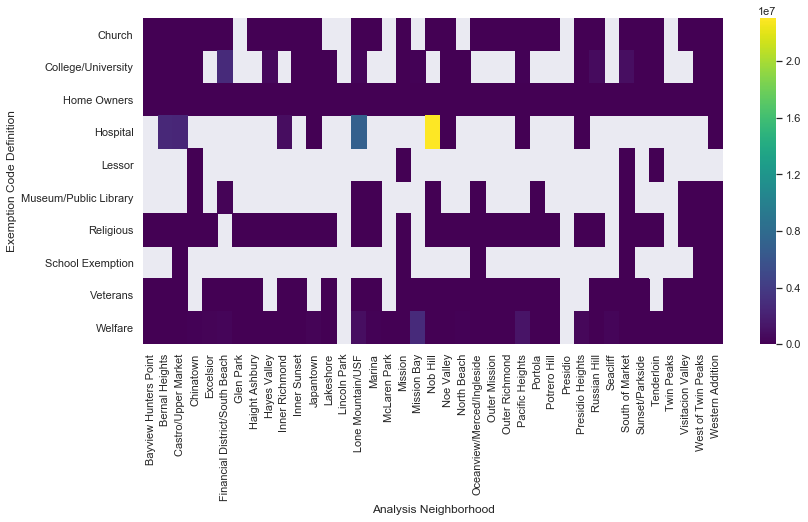

In [25]:
df_exCode_nhood_appval = df.pivot_table(index='Exemption Code Definition', columns='Analysis Neighborhood', values='Assessed Personal Property Value', aggfunc=np.mean)
df_exCode_nhood_appval
plt.subplots(figsize=(13,6))
sns.heatmap(df_exCode_nhood_appval, cmap='viridis')

Exemption Code Definition
Church                   6.987043e+02
College/University       3.301151e+05
Home Owners              2.637198e+01
Hospital                 2.352424e+06
Lessor                   0.000000e+00
Museum/Public Library    5.513602e+04
Religious                3.163430e+03
School Exemption         5.728020e+03
Veterans                 7.036082e-01
Welfare                  1.636126e+05
Name: Assessed Personal Property Value, dtype: float64


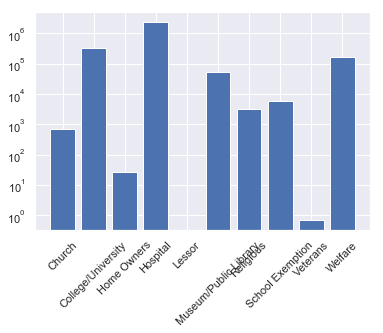

In [26]:
df_exCode_appval = df.groupby(by='Exemption Code Definition')['Assessed Personal Property Value'].mean()
print(df_exCode_appval)
fig, ax = plt.subplots(figsize=(6,4))
plt.bar(height=df_exCode_appval, x=df_exCode_appval.index)
plt.xticks(rotation=45)
ax.set_yscale('log')

Exemption Code Definition
Church                   5.677909e+05
College/University       3.134959e+06
Home Owners              0.000000e+00
Hospital                 1.618817e+07
Lessor                   2.564474e+07
Museum/Public Library    8.814812e+05
Religious                7.930222e+05
School Exemption         9.038503e+05
Veterans                 9.872374e+04
Welfare                  4.591763e+06
Name: Misc Exemption Value, dtype: float64


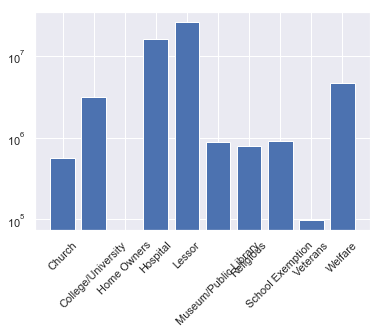

In [27]:
df_exCode_exVal = df.groupby(by='Exemption Code Definition')['Misc Exemption Value'].mean()
print(df_exCode_exVal)
fig, ax = plt.subplots(figsize=(6,4))
plt.bar(height=df_exCode_exVal, x=df_exCode_exVal.index)
plt.xticks(rotation=45)
ax.set_yscale('log')

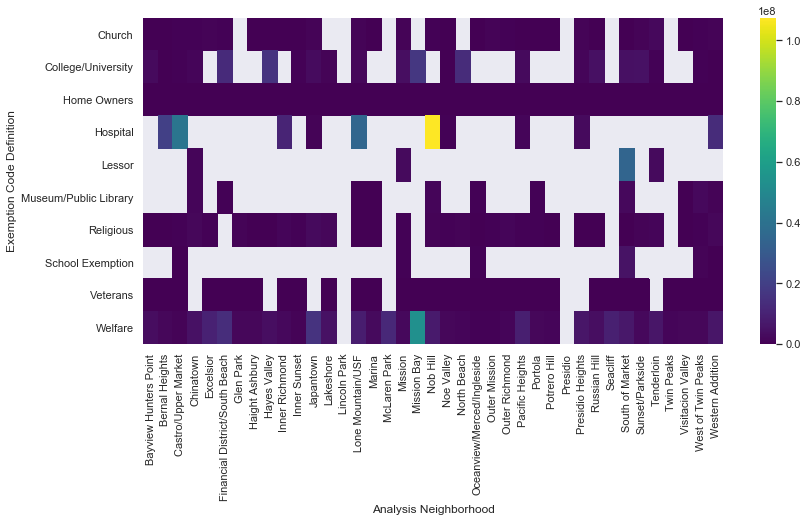

In [28]:
df_exCode_nhood_exVal = df.pivot_table(index='Exemption Code Definition', columns='Analysis Neighborhood', values='Misc Exemption Value', aggfunc=np.mean)
df_exCode_nhood_exVal
plt.subplots(figsize=(13,6))
sns.heatmap(df_exCode_nhood_exVal, cmap='viridis')

In [29]:
mask = (df['Exemption Code Definition'] == 'Lessor') & (df['Misc Exemption Value'] > 10**7)
# mask2 = df['Misc Exemption Value'] > 10**7
# print(mask, mask2)
# mask = mask and mask2
pd.set_option('max_columns', 999)
display(df[mask])

,Closed Roll Year,Property Location,Parcel Number,Block,Lot,Volume Number,Use Code,Use Definition,Property Class Code,Property Class Code Definition,Year Property Built,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,Number of Units,Zoning Code,Construction Type,Lot Depth,Lot Frontage,Property Area,Basement Area,Lot Area,Lot Code,Tax Rate Area Code,Percent of Ownership,Exemption Code,Exemption Code Definition,Status Code,Misc Exemption Value,Homeowner Exemption Value,Current Sales Date,Assessed Fixtures Value,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,Assessor Neighborhood District,Assessor Neighborhood Code,Assessor Neighborhood,Supervisor District,Analysis Neighborhood,the_geom,Row ID,latitude,longitude
327456,2009.0,0000 0845 MARKET ST0000,3705052,3705,052,25,COMO,Commercial Office,O,Office,NaN,0.0,0,0,0,0,NaN,NaN,0.00,0.0,0,0.0,268974.60,NaN,1015.0,1.0,18,Lessor,NaN,43556840.0,0.0,NaN,0.0,85191908.0,213660.0,0.0,9.0,9F,South of Market,6,South of Market,"(37.784096973177, -122.405909224134)",200901013705052,-122.405909,37.784097
375648,2011.0,0000 0845 MARKET ST0000,3705052,3705,052,25,COMO,Commercial Office,O,Office,NaN,0.0,0,0,0,0,NaN,NaN,0.00,0.0,0,0.0,268974.60,NaN,1015.0,1.0,18,Lessor,NaN,49013251.0,0.0,NaN,0.0,74457391.0,21647022.0,0.0,9.0,9F,South of Market,6,South of Market,"(37.784096973177, -122.405909224134)",201101013705052,-122.405909,37.784097
932812,2012.0,0000 0845 MARKET ST0000,3705052,3705,052,25,COMO,Commercial Office,O,Office,NaN,0.0,0,0,0,0,NaN,NaN,0.00,0.0,0,0.0,268974.60,NaN,1015.0,1.0,18,Lessor,NaN,49993515.0,0.0,NaN,0.0,75946538.0,22079962.0,0.0,9.0,9F,South of Market,6,South of Market,"(37.784096973177, -122.405909224134)",201201013705052,-122.405909,37.784097
1050301,2015.0,0000 0845 MARKET ST0000,3705052,3705,052,25,COMO,Commercial Office,O,Office,NaN,0.0,0,0,0,0,NaN,NaN,0.00,0.0,0,0.0,268974.60,NaN,1015.0,1.0,18,Lessor,NaN,52248367.0,0.0,NaN,0.0,79371947.0,23075831.0,0.0,9.0,9F,South of Market,6,South of Market,"(37.784096973177, -122.405909224134)",201501013705052,-122.405909,37.784097
1542495,2014.0,0000 0845 MARKET ST0000,3705052,3705,052,25,COMO,Commercial Office,O,Office,NaN,0.0,0,0,0,0,NaN,NaN,0.00,0.0,0,0.0,268974.60,NaN,1015.0,1.0,18,Lessor,NaN,51224894.0,0.0,NaN,0.0,77817161.0,22623808.0,0.0,9.0,9F,South of Market,6,South of Market,"(37.784096973177, -122.405909224134)",201401013705052,-122.405909,37.784097
1729266,2016.0,0112 0104 9TH ST0000,3509043,3509,043,23,MRES,Multi-Family Residential,A15,Apartment 15 Units or more,1926.0,3.0,0,12,1,2,C3S,D,81.25,0.0,14400,0.0,9208.06,R,1000.0,1.0,18,Lessor,NaN,28884052.0,0.0,2011/06/21,0.0,27567996.0,1887192.0,0.0,9.0,9F,South of Market,6,South of Market,"(37.775874401978, -122.414746113191)",201601013509043,-122.414746,37.775874
1811401,2010.0,0000 0845 MARKET ST0000,3705052,3705,052,25,COMO,Commercial Office,O,Office,NaN,0.0,0,0,0,0,NaN,NaN,0.00,0.0,0,0.0,268974.60,NaN,1015.0,1.0,18,Lessor,NaN,48646940.0,0.0,NaN,0.0,73900918.0,21485239.0,0.0,9.0,9F,South of Market,6,South of Market,"(37.784096973177, -122.405909224134)",201001013705052,-122.405909,37.784097
1933696,2016.0,0000 0845 MARKET ST0000,3705052,3705,052,25,COMO,Commercial Office,O,Office,NaN,0.0,0,0,0,0,C3R,NaN,0.00,0.0,0,0.0,268974.60,NaN,1015.0,1.0,18,Lessor,NaN,53045154.0,0.0,NaN,0.0,80582369.0,23427737.0,0.0,9.0,9F,South of Market,6,South of Market,"(37.784096973177, -122.405909224134)",201601013705052,-122.405909,37.784097
1955289,2013.0,0000 0845 MARKET ST0000,3705052,3705,052,25,COMO,Commercial Office,O,Office,NaN,0.0,0,0,0,0,NaN,NaN,0.00,0.0,0,0.0,268974.60,NaN,1015.0,1.0,18,Lessor,NaN,50993385.0,0.0,NaN,0.0,77465468.0,22521561.0,0.0,9.0,9F,South of Market,6,South of Market,"(37.784096973177, -122.405909224134)",201301013705052,-122.405909,37.784097
2144502,2017.0,0112 0104 9TH ST0000,3509043,3509,043,23,MRES,Multi-Family Residential,A15,Apartment 15 Units or more,1926.0,3.0,0,12,1,2,C3S,D,81.25,0.0,14400,0.0,9208.0